<a href="https://colab.research.google.com/github/Preetikapreetu/Retail-sales-insights/blob/main/retail_sales_insights.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

plt.rcParams["figure.figsize"] = (8,4)

DATA = Path("sales.csv")
OUT = Path("outputs")
OUT.mkdir(exist_ok=True, parents=True)

df = pd.read_csv(DATA, parse_dates=["date"])
df["year_month"] = df["date"].dt.to_period("M").astype(str)
df.head()


,date,category,product,units,unit_price,revenue,year_month
0,2024-01-01,Home,Bedsheet,1,489,489,2024-01
1,2024-01-01,Electronics,Laptop,3,5890,17670,2024-01
2,2024-01-01,Electronics,Smartwatch,4,3526,14104,2024-01
3,2024-01-01,Home,Chair,1,1291,1291,2024-01
4,2024-01-01,Grocery,Cereal,1,679,679,2024-01


In [2]:

def category_revenue(df):
    return df.groupby("category")["revenue"].sum().sort_values(ascending=False)

def monthly_revenue(df):
    return df.groupby("year_month")["revenue"].sum().reset_index()

def product_ranking(df, topn=10):
    return (df.groupby("product")["revenue"]
              .sum().sort_values(ascending=False).head(topn).reset_index())


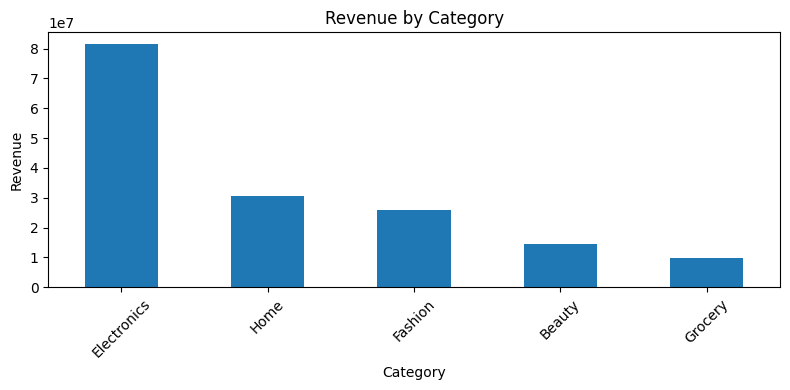

In [3]:

# Category revenue bar chart
cat_rev = category_revenue(df)
ax = cat_rev.plot(kind="bar", rot=45, title="Revenue by Category")
ax.set_xlabel("Category"); ax.set_ylabel("Revenue")
plt.tight_layout(); plt.savefig(OUT / "category_revenue.png"); plt.show()
cat_rev.to_csv(OUT / "category_revenue.csv")


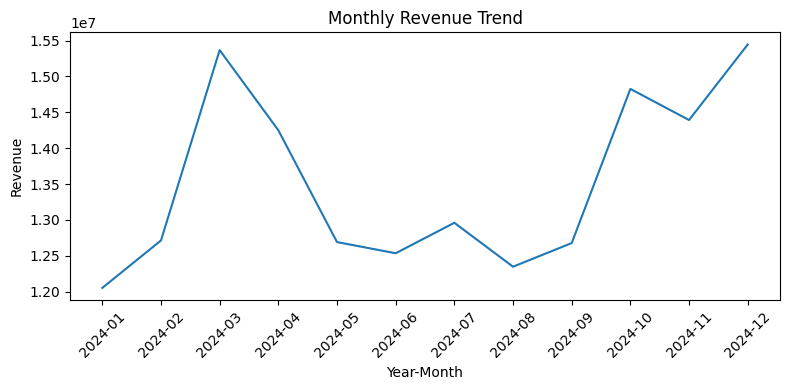

In [4]:

# Monthly revenue trend
mr = monthly_revenue(df)
plt.plot(mr["year_month"], mr["revenue"])
plt.title("Monthly Revenue Trend")
plt.xlabel("Year-Month"); plt.ylabel("Revenue")
plt.xticks(rotation=45)
plt.tight_layout(); plt.savefig(OUT / "monthly_revenue.png"); plt.show()
mr.to_csv(OUT / "monthly_revenue.csv", index=False)


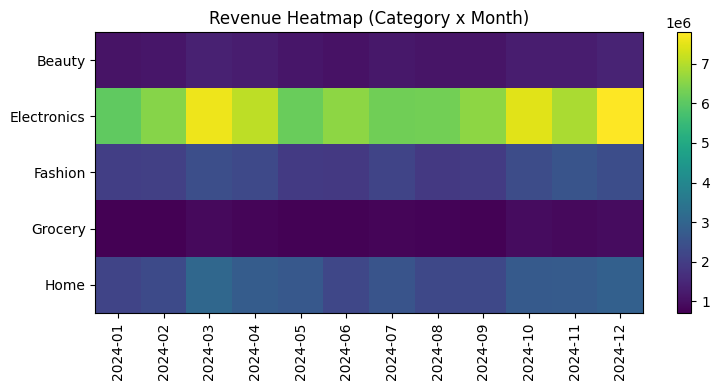

In [5]:

# Pivot heatmap of category vs month
pivot = df.pivot_table(index="category", columns="year_month", values="revenue", aggfunc="sum").fillna(0)
fig, ax = plt.subplots()
im = ax.imshow(pivot.values, aspect="auto")
ax.set_yticks(range(len(pivot.index))); ax.set_yticklabels(pivot.index)
ax.set_xticks(range(len(pivot.columns))); ax.set_xticklabels(pivot.columns, rotation=90)
ax.set_title("Revenue Heatmap (Category x Month)")
plt.colorbar(im)
plt.tight_layout(); plt.savefig(OUT / "heatmap_category_month.png"); plt.show()
pivot.to_csv(OUT / "heatmap_category_month.csv")


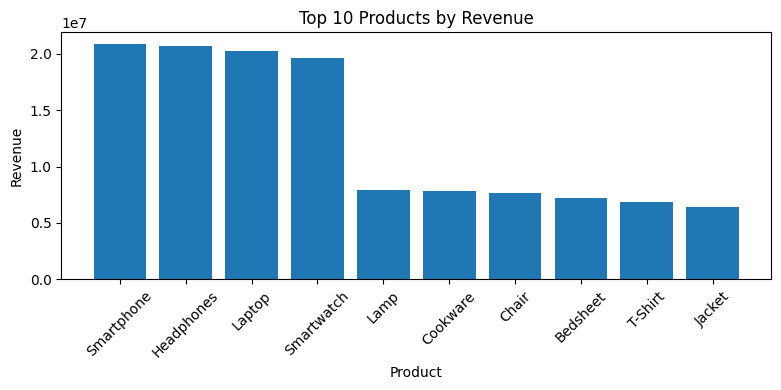

In [6]:

# Top products
top10 = product_ranking(df, topn=10)
plt.bar(top10["product"], top10["revenue"])
plt.title("Top 10 Products by Revenue"); plt.xticks(rotation=45)
plt.xlabel("Product"); plt.ylabel("Revenue")
plt.tight_layout(); plt.savefig(OUT / "top_products.png"); plt.show()
top10.to_csv(OUT / "top_products.csv", index=False)


**How to use:** Run all cells. The figures are saved to the `outputs/` folder as PNGs along with CSV summaries. Add 1–2 charts to your resume/portfolio.